<a href="https://colab.research.google.com/github/thesaifmustafa8/TECHIN513/blob/main/HW3_Saif_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Saif Mustafa, Hyunsuk Bang, Vinitha Erusu, Soojin Hwang**

TECHIN 513 - HW3

# **Getting Started with Audio Data Analysis using Deep Learning**

---

In [ ]:
# !pip install simpleaudio
import os
import random
import csv
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt
import IPython
import numpy as np
import time

**Get google colab directory**

In [ ]:
working_dir = os.getcwd()
print(working_dir)

/content


In [ ]:
# CHANGE THIS: Path of the UrbanSound8K directory
dir_path = r"/content/drive/MyDrive/UrbanSound8K"

os.chdir(dir_path)
data_dir_path = "./audio/"
label_path = "./metadata/UrbanSound8K.csv"

train_ratio = 0.7

In [ ]:
print(dir_path+data_dir_path[1:])

/content/drive/MyDrive/UrbanSound8K/audio/


**Script provided to extract the path of the sound files while doing the train test split is provided**

In [ ]:
def list_shuffle(lst, seed=42):
    random.seed(seed)
    random.shuffle(lst)
    return lst

In [ ]:
'''
Head of UrbanSound8K.csv

['slice_file_name', 'fsID', 'start', 'end',
 'salience', 'fold', 'classID', 'class']
 
'''

with open(label_path, newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

data_info = []
sampling_info = []

for i in range(1,len(data)):
    data_info.append([data_dir_path+"fold"+data[i][-3]+"/"+data[i][0],data[i][-2],data[i][-1]]) 

with open("./raw_data_label.csv","w",newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(["file_path","label","label_name"])
    writer.writerows(data_info)
    
data_info = list_shuffle(data_info)
slice_point = int(len(data_info)*train_ratio)

with open("./train.csv","w",newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(["file_path","label","label_name"])
    writer.writerows(data_info[0:slice_point])
    
with open("./test.csv","w",newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(["file_path","label","label_name"])
    writer.writerows(data_info[slice_point:])

**Urban Sounds Metadata:** https://urbansounddataset.weebly.com/urbansound8k.html 

> **slice_file_name:**
The name of the audio file. The name takes the following format: `[fsID]-[classID]-[occurrenceID]-[sliceID].wav`, where:
  * [fsID] = the Freesound ID of the recording from which this excerpt (slice) is taken
  * [classID] = a numeric identifier of the sound class (see description of classID below for further details)
  * [occurrenceID] = a numeric identifier to distinguish different occurrences of the sound within the original recording
  * [sliceID] = a numeric identifier to distinguish different slices taken from the same occurrence


---


> **fsID** =
The Freesound ID of the recording from which this excerpt (slice) is taken

> **start** =
The start time of the slice in the original Freesound recording

> **end**:
The end time of slice in the original Freesound recording

> **salience**:
A (subjective) salience rating of the sound. 1 = foreground, 2 = background.

> **fold**:
The fold number (1-10) to which this file has been allocated.

> **classID**:
A numeric identifier of the sound class:
0 = air_conditioner
1 = car_horn
2 = children_playing
3 = dog_bark
4 = drilling
5 = engine_idling
6 = gun_shot
7 = jackhammer
8 = siren
9 = street_music

> **class**:
The class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, 
siren, street_music.

In [ ]:
import librosa
import librosa.display
import glob

**Using librosa to get sampling rate**

In [ ]:
data, sampling_rate = librosa.load('/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-2.wav')
print(data)
print(sampling_rate)

[-0.00011783 -0.00017157 -0.00017749 ... -0.04598654 -0.04624664
 -0.05089863]
22050


**Visualizing each class of audio file's waveform**

In [ ]:
from IPython.core.pylabtools import figsize
% pylab inline
import os
import pandas as pd
import librosa
import glob 

# I'm just plotting a sample from each class of recordings to visually inspect 
# all from folder 1
audio_1, sampling_rate = librosa.load('/content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-0.wav') # air_conditioner
audio_2, sampling_rate = librosa.load('/content/drive/MyDrive/UrbanSound8K/audio/fold1/175845-1-0-0.wav') # car_horn
audio_3, sampling_rate = librosa.load('/content/drive/MyDrive/UrbanSound8K/audio/fold1/15564-2-0-0.wav') # children_playing
audio_4, sampling_rate = librosa.load('/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-2.wav') # dog_bark
audio_5, sampling_rate = librosa.load('/content/drive/MyDrive/UrbanSound8K/audio/fold1/14113-4-0-0.wav') # drilling
audio_6, sampling_rate = librosa.load('/content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-0.wav') # engine_idling
audio_7, sampling_rate = librosa.load('/content/drive/MyDrive/UrbanSound8K/audio/fold1/174290-6-1-0.wav') # gun_shot
audio_8, sampling_rate = librosa.load('/content/drive/MyDrive/UrbanSound8K/audio/fold1/174276-7-0-0.wav') # jackhammer
audio_9, sampling_rate = librosa.load('/content/drive/MyDrive/UrbanSound8K/audio/fold1/43806-8-0-0.wav') # siren
audio_10, sampling_rate = librosa.load('/content/drive/MyDrive/UrbanSound8K/audio/fold1/21684-9-0-12.wav') # street_music


Populating the interactive namespace from numpy and matplotlib


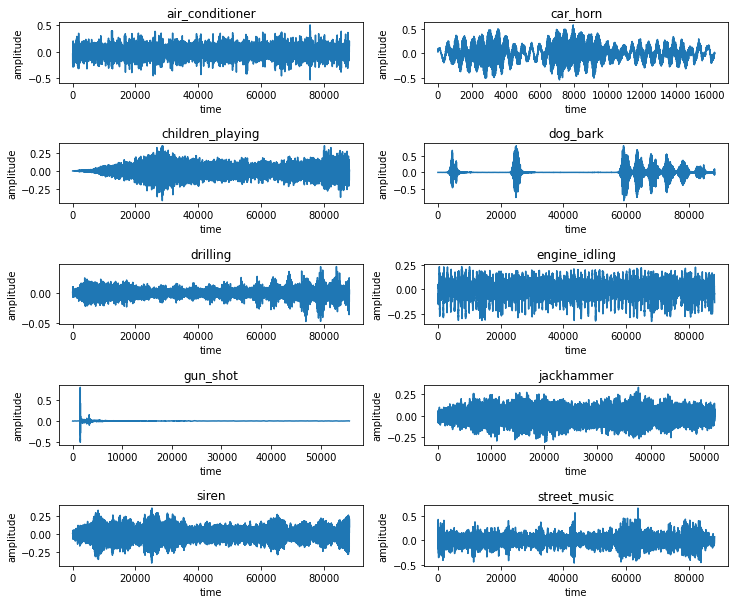

In [ ]:
fig, ax = plt.subplots(5,2,figsize=(12,10))

fig.subplots_adjust(hspace=1)

ax[0,0].plot(audio_1)
ax[0,1].plot(audio_2)
ax[1,0].plot(audio_3)
ax[1,1].plot(audio_4)
ax[2,0].plot(audio_5)
ax[2,1].plot(audio_6)
ax[3,0].plot(audio_7)
ax[3,1].plot(audio_8)
ax[4,0].plot(audio_9)
ax[4,1].plot(audio_10)

ax[0,0].set(title='air_conditioner', xlabel ='time', ylabel ='amplitude')
ax[0,1].set(title='car_horn', xlabel ='time', ylabel ='amplitude')
ax[1,0].set(title='children_playing', xlabel ='time', ylabel ='amplitude')
ax[1,1].set(title='dog_bark', xlabel ='time', ylabel ='amplitude')
ax[2,0].set(title='drilling', xlabel ='time', ylabel ='amplitude')
ax[2,1].set(title='engine_idling', xlabel ='time', ylabel ='amplitude')
ax[3,0].set(title='gun_shot', xlabel ='time', ylabel ='amplitude')
ax[3,1].set(title='jackhammer', xlabel ='time', ylabel ='amplitude')
ax[4,0].set(title='siren', xlabel ='time', ylabel ='amplitude')
ax[4,1].set(title='street_music', xlabel ='time', ylabel ='amplitude')

plt.show()

**Plotting different waveform to visually differentiate**

> A **cepstrum** is derived from taking the inverse Fourier transform of the logarithm of the raw signal spectrum. There are complex, power, phase, and real cepstrum representations. Among these, the power cepstrum proves to be the most relevant for speech signal processing. The analysis of the cepstrum is called quefrency analysis (the naming is a physicist' inside-joke to drawing a direct parallel to frequency analysis in the spectrum domain) or liftering (a parallel to filtering in the spectrum domain). Cepstrum features can be used for pitch detection, and speech recognition and enhancement.

> **Mel-frequency cepstral coefficients** represent the short-time power an audio clip based on the discrete cosine transform of the log power spectrum on a non-linear mel scale. The difference between a cepstrum and the mel-frequency cepstrum (MFC) is that in the MFC, the frequency bands are equally spaced on the mel scale to more closely resemble the human auditory system's response as opposed to the linearly-spaced bands in the normal spectrum. This frequency warping allows for better representation of sound and is especially useful in audio compression.

> **Chroma** features are a powerful representation of music audio in which we use a 12-element representation of spectral energy called a chroma vector where each of the 12 bins represeent the 12 equal-tempered pitch class of western-type music (semitone spacing). It can be computed from the logarithmic short-time Fourier transform of the input sound signal, also called a chromagram or a pitch class profile.

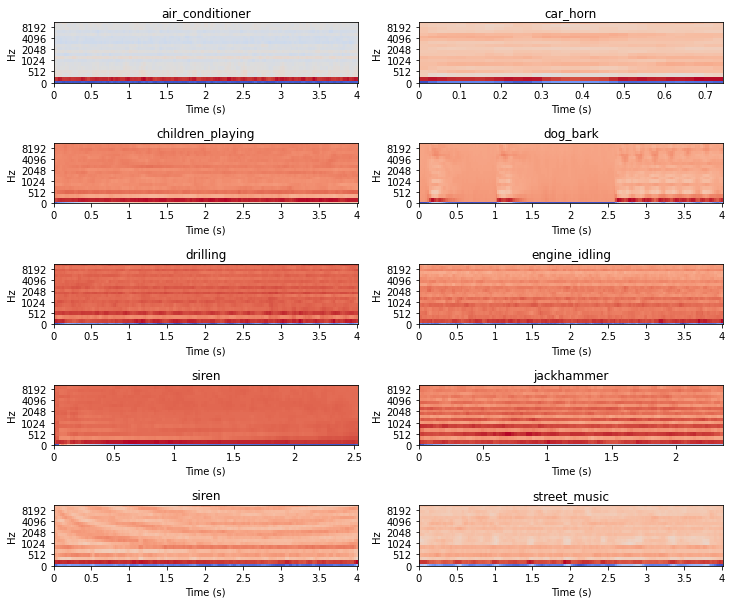

In [ ]:
fig, ax = plt.subplots(5,2,figsize=(12,10))

fig.subplots_adjust(hspace=1)

mfccs = librosa.feature.mfcc(audio_1)
librosa.display.specshow(mfccs, y_axis='mel' ,x_axis='s', cmap='coolwarm', ax=ax[0, 0])
ax[0,0].set(title='air_conditioner')

mfccs = librosa.feature.mfcc(audio_2)
librosa.display.specshow(mfccs, y_axis='mel' ,x_axis='s', cmap='coolwarm', ax=ax[0, 1])
ax[0,1].set(title='car_horn')

mfccs = librosa.feature.mfcc(audio_3)
librosa.display.specshow(mfccs, y_axis='mel' ,x_axis='s', cmap='coolwarm', ax=ax[1, 0])
ax[1,0].set(title='children_playing')

mfccs = librosa.feature.mfcc(audio_4)
librosa.display.specshow(mfccs, y_axis='mel' ,x_axis='s', cmap='coolwarm', ax=ax[1, 1])
ax[1,1].set(title='dog_bark')

mfccs = librosa.feature.mfcc(audio_5)
librosa.display.specshow(mfccs, y_axis='mel' ,x_axis='s', cmap='coolwarm', ax=ax[2, 0])
ax[2,0].set(title='drilling')

mfccs = librosa.feature.mfcc(audio_6)
librosa.display.specshow(mfccs, y_axis='mel' ,x_axis='s', cmap='coolwarm', ax=ax[2, 1])
ax[2,1].set(title='engine_idling')

mfccs = librosa.feature.mfcc(audio_7)
librosa.display.specshow(mfccs, y_axis='mel' ,x_axis='s', cmap='coolwarm', ax=ax[3, 0])
ax[3,0].set(title='siren')

mfccs = librosa.feature.mfcc(audio_8)
librosa.display.specshow(mfccs, y_axis='mel' ,x_axis='s', cmap='coolwarm', ax=ax[3, 1])
ax[3,1].set(title='jackhammer')

mfccs = librosa.feature.mfcc(audio_9)
librosa.display.specshow(mfccs, y_axis='mel' ,x_axis='s', cmap='coolwarm', ax=ax[4, 0])
ax[4,0].set(title='siren')

mfccs = librosa.feature.mfcc(audio_10)
librosa.display.specshow(mfccs, y_axis='mel' ,x_axis='s', cmap='coolwarm', ax=ax[4, 1])
ax[4,1].set(title='street_music')


plt.show()

> As we can see, using MFCC, its still not very clear to distinguish the audio files. I then thought of using chromagrams:

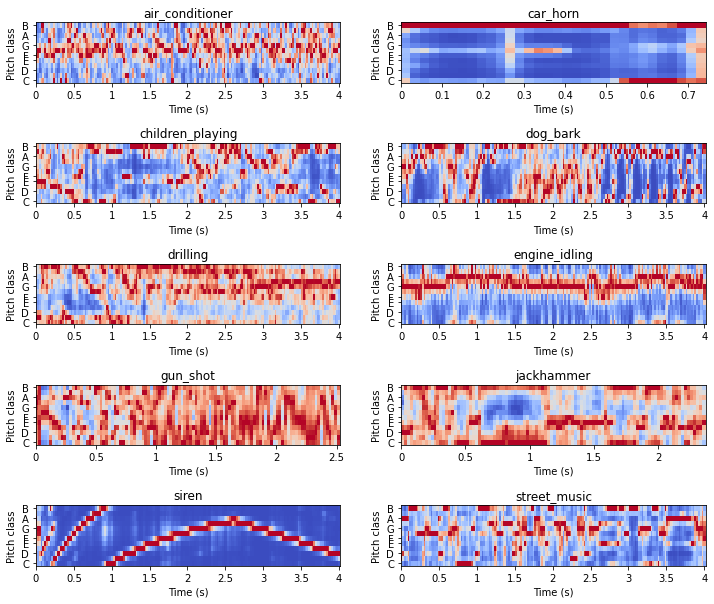

In [ ]:
fig, ax = plt.subplots(5,2,figsize=(12,10))

fig.subplots_adjust(hspace=1)

chromagram = librosa.feature.chroma_stft(audio_1)
librosa.display.specshow(chromagram, x_axis='s', y_axis='chroma', cmap='coolwarm', ax=ax[0, 0])
ax[0,0].set(title='air_conditioner')

chromagram = librosa.feature.chroma_stft(audio_2)
librosa.display.specshow(chromagram, x_axis='s', y_axis='chroma', cmap='coolwarm', ax=ax[0, 1])
ax[0,1].set(title='car_horn')

chromagram = librosa.feature.chroma_stft(audio_3)
librosa.display.specshow(chromagram, x_axis='s', y_axis='chroma', cmap='coolwarm', ax=ax[1, 0])
ax[1,0].set(title='children_playing')

chromagram = librosa.feature.chroma_stft(audio_4)
librosa.display.specshow(chromagram, x_axis='s', y_axis='chroma', cmap='coolwarm', ax=ax[1, 1])
ax[1,1].set(title='dog_bark')

chromagram = librosa.feature.chroma_stft(audio_5)
librosa.display.specshow(chromagram, x_axis='s', y_axis='chroma', cmap='coolwarm', ax=ax[2, 0])
ax[2,0].set(title='drilling')

chromagram = librosa.feature.chroma_stft(audio_6)
librosa.display.specshow(chromagram, x_axis='s', y_axis='chroma', cmap='coolwarm', ax=ax[2, 1])
ax[2,1].set(title='engine_idling')

chromagram = librosa.feature.chroma_stft(audio_7)
librosa.display.specshow(chromagram, x_axis='s', y_axis='chroma', cmap='coolwarm', ax=ax[3, 0])
ax[3,0].set(title='gun_shot')

chromagram = librosa.feature.chroma_stft(audio_8)
librosa.display.specshow(chromagram, x_axis='s', y_axis='chroma', cmap='coolwarm', ax=ax[3, 1])
ax[3,1].set(title='jackhammer')

chromagram = librosa.feature.chroma_stft(audio_9)
librosa.display.specshow(chromagram, x_axis='s', y_axis='chroma', cmap='coolwarm', ax=ax[4, 0])
ax[4,0].set(title='siren')


chromagram = librosa.feature.chroma_stft(audio_10)
librosa.display.specshow(chromagram, x_axis='s', y_axis='chroma', cmap='coolwarm', ax=ax[4, 1])
ax[4,1].set(title='street_music')


plt.show()

> As we can see, chromagrams for each audio files are more distinct. I will use this to benchmark our waveform audio file by training and modelling on both datasets to see which performs better.

**Hypothesis:** Models based on chromagrams will perform better than simple waveforms

**Train/Test split:**
*   Displaying value counts for each class of audio files in our dataset
*   Creating the train and test dataframe using the `train.csv` and `test.csv `files that contain paths



In [ ]:
train = pd.read_csv(os.path.join(dir_path, 'train.csv'))
test = pd.read_csv(os.path.join(dir_path, 'test.csv'))

train.label_name.value_counts()

drilling            724
street_music        713
engine_idling       704
jackhammer          703
air_conditioner     703
children_playing    696
dog_bark            684
siren               638
car_horn            292
gun_shot            255
Name: label_name, dtype: int64

> Dataset shows some bias for certain samples, for example `drilling` has more ~3 times more datapoints than `gun_shots`.

**Building the Model:**

1.   Load audio files
2.   Extract features from audio
3.   Flatten our data to pass it on our DL model
4. Run DL model and get results



> Changed librosa reample type `res_type` parameter to **kaiser_best** for better performance

In [ ]:
import time

def parser(row):
   # function to load files and extract features
   file_name = os.path.join(os.path.abspath(dir_path+str(row.file_path)[1:]))
   # print("File =",str(row.file_path)[1:])
   # handle exception to check if there isn't a file which is corrupted
   try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_best') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
   except Exception as e:
      print("Error encountered while parsing file: ", file_name)
      return None, None
 
   feature = mfccs
   label = row.label_name

   # return [feature, label]
   return pd.Series([feature, label])

start = time.time()

temp = train.apply(parser, axis=1)
temp.columns = ['feature', 'label']

end = time.time()

print("Extracted features in ",end-start,"seconds")

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]


Extracted features in  2830.628217935562 seconds


In [ ]:
import time

def parser(row):
   # function to load files and extract features
   file_name = os.path.join(os.path.abspath(dir_path+str(row.file_path)[1:]))
   # print("File =",str(row.file_path)[1:])
   # handle exception to check if there isn't a file which is corrupted
   try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # we extract mfcc feature from data
      chromoagrams = np.mean(librosa.feature.chroma_stft(y=X, sr=sample_rate, n_chroma=12).T,axis=0)
   except Exception as e:
      print("Error encountered while parsing file: ", file_name)
      return None, None
 
   feature_c = chromoagrams
   label_c = row.label_name
 
   # return [feature, label]
   return pd.Series([feature_c, label_c])

start = time.time()

temp_c = train.apply(parser, axis=1)
temp_c.columns = ['feature', 'label']

end = time.time()

print("Extracted features in ",end-start,"seconds")

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]


Extracted features in  625.1120188236237 seconds


**Flatten our dataset into a list**

In [ ]:
temp.columns

Index(['feature', 'label'], dtype='object')

In [ ]:
# !pip install np_utils

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# simple waveform parameters
X = np.array(temp.feature.tolist())
y = np.array(temp.label.tolist())

# chromagram parameters
X_c = np.array(temp_c.feature.tolist())
y_c = np.array(temp_c.label.tolist())

lb = LabelEncoder()

y = np_utils.to_categorical(lb.fit_transform(y))
y_c = np_utils.to_categorical(lb.fit_transform(y_c))

**Running the deep learning model to get results**

> Changes the activation function for first layer to **sigmoid** so we don't lose as many initial features

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
#from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow import keras
from keras.utils import np_utils
from sklearn import metrics 

> **MODEL 1: SIMPLE WAVEFORM**

> Using a mix of `sigmoid` and `relu` gave best performance

![picture](https://miro.medium.com/max/1400/1*XxxiA0jJvPrHEJHD4z893g.png)

In [ ]:
num_labels = y.shape[1]
filter_size = 2

# build model
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

# opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

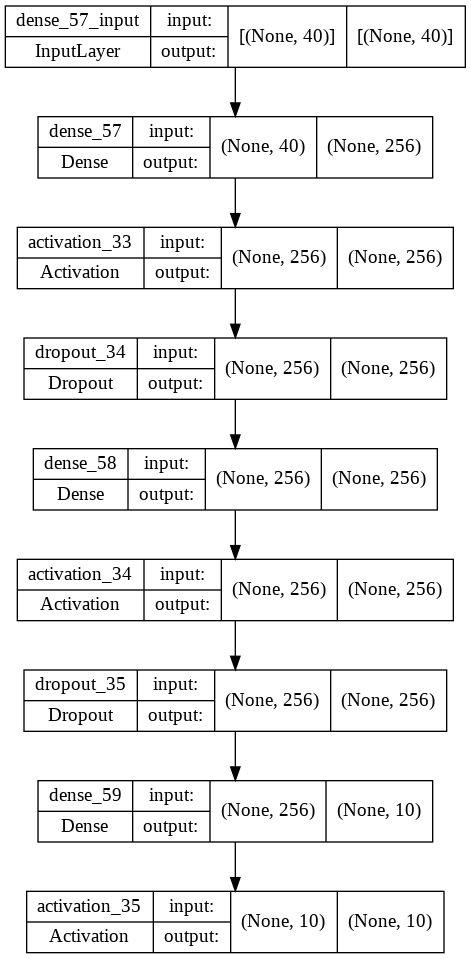

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

> **MODEL 2: CHROMAGRAM**

In [ ]:
num_labels = y_c.shape[1]

# build model
model_c = Sequential()

model_c.add(Dense(256, input_shape=(12,)))
model_c.add(Activation('relu'))
model_c.add(Dropout(0.5))

model_c.add(Dense(256))
model_c.add(Activation('relu'))
model_c.add(Dropout(0.5))

model_c.add(Dense(num_labels))
model_c.add(Activation('softmax'))

# opt = keras.optimizers.Adam(learning_rate=0.0001)

model_c.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

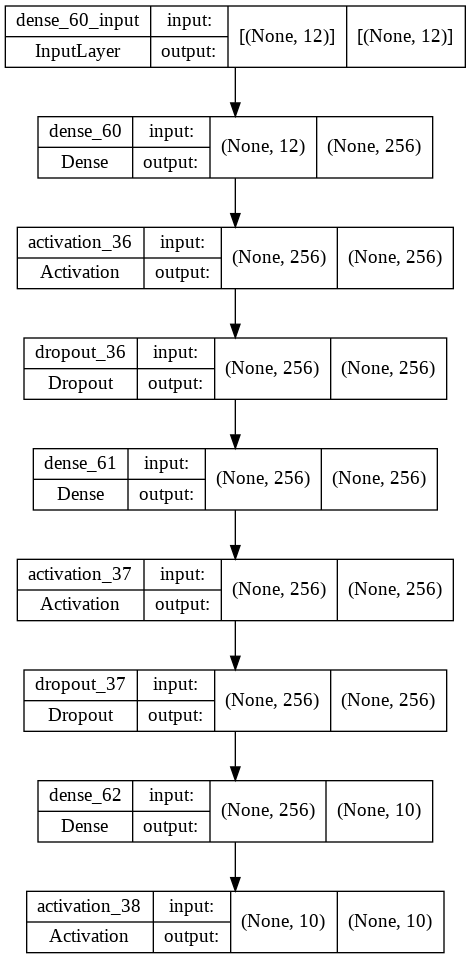

In [ ]:
keras.utils.plot_model(model_c, show_shapes=True)

In [ ]:
X.shape

(6112, 40)

**Training the model for results**

> Changed the `epochs` to 20

In [ ]:
history = model.fit(X, y, batch_size=32, epochs=20, validation_data=(X, y))
print("-----")
print("-----")
print("-----")
print("-----")
print("-----")
history_c = model_c.fit(X_c, y_c, batch_size=128, epochs=20, validation_data=(X_c, y_c))

Epoch 1/20
191/191 [==============================] - 2s 9ms/step - loss: 0.7777 - accuracy: 0.7369 - val_loss: 0.4874 - val_accuracy: 0.8523
Epoch 2/20
191/191 [==============================] - 2s 9ms/step - loss: 0.7735 - accuracy: 0.7387 - val_loss: 0.4860 - val_accuracy: 0.8518
Epoch 3/20
191/191 [==============================] - 1s 5ms/step - loss: 0.7271 - accuracy: 0.7534 - val_loss: 0.4864 - val_accuracy: 0.8524
Epoch 4/20
191/191 [==============================] - 1s 5ms/step - loss: 0.7134 - accuracy: 0.7554 - val_loss: 0.4533 - val_accuracy: 0.8573
Epoch 5/20
191/191 [==============================] - 1s 5ms/step - loss: 0.7098 - accuracy: 0.7598 - val_loss: 0.4641 - val_accuracy: 0.8617
Epoch 6/20
191/191 [==============================] - 1s 5ms/step - loss: 0.6966 - accuracy: 0.7593 - val_loss: 0.4305 - val_accuracy: 0.8693
Epoch 7/20
191/191 [==============================] - 1s 5ms/step - loss: 0.6822 - accuracy: 0.7709 - val_loss: 0.4252 - val_accuracy: 0.8735
Epoch 

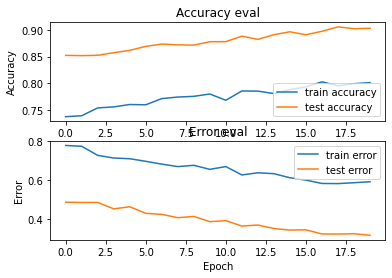

In [ ]:
fig, axs = plt.subplots(2)

# create accuracy sublpot
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")

# create error sublpot
axs[1].plot(history.history["loss"], label="train error")
axs[1].plot(history.history["val_loss"], label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")

plt.show()

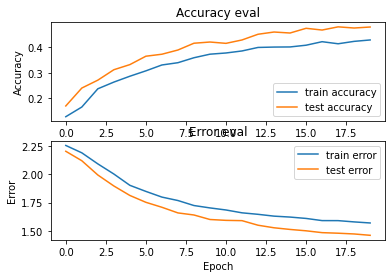

In [ ]:
fig, axs = plt.subplots(2)

# create accuracy sublpot
axs[0].plot(history_c.history["accuracy"], label="train accuracy")
axs[0].plot(history_c.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")

# create error sublpot
axs[1].plot(history_c.history["loss"], label="train error")
axs[1].plot(history_c.history["val_loss"], label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")

plt.show()

**RESULT**

> **Model 1 Accruacy** = 90.33%

> **Model 2 Accruacy** = 48.10%

> Model 1 using simple waveforms was more accruate than Model 2, which used chromagram, which disproves our hypothesis.